In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
xTrain=pd.read_csv('xTrain_full.csv', index_col=0)
yTrain=pd.read_csv('yTrain_full.csv', index_col=0)
xTest=pd.read_csv('xTest_full.csv', index_col=0)
yTest=pd.read_csv('yTest_full.csv', index_col=0)

In [4]:
xTest

,Reviews,Size,Installs,Price,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,...,Tools,Tools;Education,Travel & Local,Travel & Local;Action & Adventure,Trivia,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Word
6860,-0.163534,-0.580132,-0.196181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9323,-0.163417,-0.701779,-0.195688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6355,-0.163244,-0.823427,-0.195140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9221,-0.163560,-0.171744,-0.196230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4547,0.243169,-0.823427,0.899517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,-0.163403,0.349603,-0.195140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3080,-0.010439,0.436494,-0.086660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5363,-0.163559,0.175821,-0.196225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8827,-0.153350,-0.823427,-0.185278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
yTest

,numerical
6860,3.8
9323,4.2
6355,4.3
9221,4.8
4547,4.4
...,...
4172,4.4
3080,4.5
5363,3.8
8827,3.6


linear regression

In [6]:
reg = LinearRegression().fit(xTrain, yTrain)
yHat = reg.predict(xTest)
print(yHat)
print(yTest['numerical'])
mse_lr = mean_squared_error(yTest['numerical'], yHat)
print(mse_lr)
# print(reg.coef_)

[[4.25981595]
 [4.1520156 ]
 [4.20183656]
 ...
 [4.19346447]
 [4.08406459]
 [4.26541019]]
6860    3.8
9323    4.2
6355    4.3
9221    4.8
4547    4.4
       ... 
4172    4.4
3080    4.5
5363    3.8
8827    3.6
2992    3.4
Name: numerical, Length: 2466, dtype: float64
0.24276097877203487


In [7]:
xTrain=pd.read_csv('xTrain.csv', index_col=0)
yTrain=pd.read_csv('yTrain.csv', index_col=0)
xTest=pd.read_csv('xTest.csv', index_col=0)
yTest=pd.read_csv('yTest.csv', index_col=0)

RandomForest Regressor

In [8]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [9]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xTrain, yTrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [10]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [11]:
import math
math.sqrt(len(xTrain.columns))

11.269427669584644

In [12]:

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100],
    'max_features': [3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2, 3],
    'n_estimators': [700, 800, 900, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(xTrain, yTrain)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [90, 100],
                         'max_features': [3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [2, 3],
                         'n_estimators': [700, 800, 900, 1000]},
             verbose=2)

In [13]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 900}

In [16]:
rf = RandomForestRegressor(bootstrap = True,
 max_depth = 90,
 max_features = 3,
 min_samples_leaf = 5,
 min_samples_split = 3,
 n_estimators =1000)
rf.fit(xTrain, yTrain['numerical'])
yHat = rf.predict(xTest)
mean_squared_error(yTest['numerical'], yHat)

0.2405939464879748

In [17]:
yTrain_kn = pd.read_csv('CateyTrain.csv', index_col=0)
yTest_kn = pd.read_csv('CateyTest.csv', index_col=0)
yTrain_kn

,1,0.5,0.2
0,4-5,4.0-4.4,4.0-4.1
1,4-5,4.5-4.9,4.6-4.7
2,4-5,4.0-4.4,4.4-4.5
3,3-4,3.5-3.9,3.6-3.7
4,4-5,4.0-4.4,4.0-4.1
...,...,...,...
5749,4-5,4.5-4.9,4.6-4.7
5750,4-5,4.0-4.4,4.0-4.1
5751,4-5,4.0-4.4,4.2-4.3
5752,4-5,4.0-4.4,4.0-4.1


In [18]:
clf = GridSearchCV(
        KNeighborsClassifier(), 
        [{'n_neighbors': range(1,len(xTrain),100), 'metric': ['euclidean','manhattan']}], cv=5)
clf.fit(xTrain, yTrain_kn['1'])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'metric': ['euclidean', 'manhattan'],
                          'n_neighbors': range(1, 5754, 100)}])

In [19]:
clf.best_params_

{'metric': 'euclidean', 'n_neighbors': 101}

In [20]:
KN = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 1)
KN.fit(xTrain, yTrain_kn['1'])
yHat = KN.predict(xTest)
print(yHat)

['3-4' '4-5' '4-5' ... '4-5' '4-5' '3-4']


In [35]:
accuracy_score(yHat, yTest_kn['1'])

0.6861313868613139

In [36]:
clf = GridSearchCV(
        KNeighborsClassifier(), 
        [{'n_neighbors': range(1,len(xTrain),100), 'metric': ['euclidean','manhattan']}], cv=5)
clf.fit(xTrain, yTrain_kn['0.5'])
clf.best_params_

{'metric': 'euclidean', 'n_neighbors': 101}

In [37]:
KN = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 301)
KN.fit(xTrain, yTrain_kn['0.5'])
yHat = KN.predict(xTest)
print(yHat)
accuracy_score(yHat, yTest_kn['0.5'])

['4.0-4.4' '4.0-4.4' '4.0-4.4' ... '4.0-4.4' '4.0-4.4' '4.0-4.4']


0.4724249797242498

In [39]:
clf = GridSearchCV(
        KNeighborsClassifier(), 
        [{'n_neighbors': range(1,len(xTrain),100), 'metric': ['euclidean','manhattan']}], cv=5)
clf.fit(xTrain, yTrain_kn['0.2'])
clf.best_params_

KeyboardInterrupt: 

In [40]:
KN = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 701)
KN.fit(xTrain, yTrain_kn['0.2'])
yHat = KN.predict(xTest)
print(yHat)
accuracy_score(yHat, yTest_kn['0.2'])

['4.2-4.3' '4.4-4.5' '4.4-4.5' ... '4.4-4.5' '4.4-4.5' '4.4-4.5']


0.3150851581508516

In [ ]:
#knn regressor

In [41]:
xTrain = pd.read_csv("xTrain.csv",index_col = 0).to_numpy()
xTest  = pd.read_csv("xTest.csv",index_col = 0).to_numpy()
yTrain = pd.read_csv("yTrain.csv",index_col = 0).to_numpy()
yTest  = pd.read_csv("yTest.csv",index_col = 0).to_numpy()

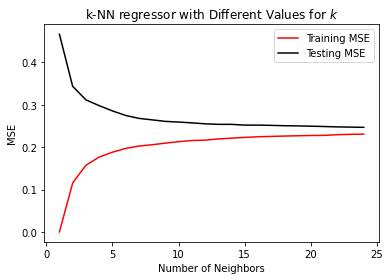

In [45]:
train_scores = []
test_scores = []
k_list = np.arange(1, 25)
# For each k
for k in k_list:
    # Initialize, fit, predict
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(xTrain, yTrain)

    pred_y_test = knn.predict(xTest)
    pred_y_train = knn.predict(xTrain)
        
    train_scores.append(mean_squared_error(yTrain, pred_y_train))
    test_scores.append(mean_squared_error(yTest, pred_y_test))

# Plot
fig, ax = plt.subplots()
    
ax.plot(k_list, train_scores, label='Training MSE', color='red')
ax.plot(k_list, test_scores, label='Testing MSE', color='black')

ax.set(title='k-NN regressor with Different Values for $k$',
           xlabel='Number of Neighbors',
           ylabel='MSE')
    
ax.legend()

plt.show()

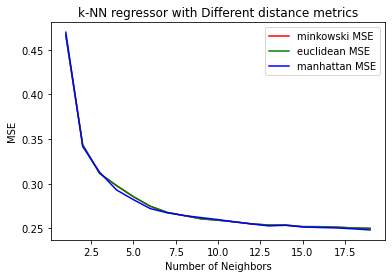

In [46]:
min_scores = []
eu_scores = []
man_scores = []
k_list = np.arange(1,20)
# For each k
for k in k_list:
    # Initialize, fit, predict
    knn_min = KNeighborsRegressor(n_neighbors=k, metric='minkowski')
    knn_min.fit(xTrain, yTrain)
    knn_eu = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn_eu.fit(xTrain, yTrain)
    knn_man = KNeighborsRegressor(n_neighbors=k, metric='manhattan')
    knn_man.fit(xTrain, yTrain)

    pred_y_min = knn_min.predict(xTest)
    min_scores.append(mean_squared_error(yTest, pred_y_min))
    pred_y_eu = knn_eu.predict(xTest)
    eu_scores.append(mean_squared_error(yTest, pred_y_eu))
    pred_y_man = knn_man.predict(xTest)
    man_scores.append(mean_squared_error(yTest, pred_y_man))

# Plot
fig, ax = plt.subplots()
    
ax.plot(k_list, min_scores, label='minkowski MSE', color='red')
ax.plot(k_list, eu_scores, label='euclidean MSE', color='green')
ax.plot(k_list, man_scores, label='manhattan MSE', color='blue')

ax.set(title='k-NN regressor with Different distance metrics',
           xlabel='Number of Neighbors',
           ylabel='MSE')
    
ax.legend()

plt.show()

In [44]:
knn = KNeighborsRegressor(n_neighbors=15, metric = 'manhattan')
knn.fit(xTrain, yTrain)
# knn.fit(xTrain, yTrain)
pred_y = knn.predict(xTest)
scores_regr = mean_squared_error(yTest, pred_y)
scores_regr

0.2516810669550329